### References

https://medium.com/machine-learning-researcher/self-organizing-map-som-c296561e2117

https://github.com/JustGlowing/minisom

https://www.geeksforgeeks.org/calculate-the-euclidean-distance-using-numpy/

https://towardsdatascience.com/kohonen-self-organizing-maps-a29040d688da

### Imports

In [3]:
# !pip install minisom

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom    
from pylab import bone, pcolor, colorbar, plot, show, legend
import time
%matplotlib inline

### Functions

In [30]:
def execution_time_calculator(t0):
    print(f"time is: {time.time() -t0} seconds.")


def gaussian_distance(d, sigma=0.5):
    h = np.exp(- np.power(d,2) / (2 * np.power(sigma,2)))
    return h


# This function is implemented but not used.
def mexhat_np(t, sigma=1):
    """Computes Mexican hat shape using numpy, see
    http://en.wikipedia.org/wiki/Mexican_hat_wavelet for
    equation (13 Dec 2011)"""
    c = 2. / np.sqrt(3 * sigma) * np.pi ** 0.25
    return c * (1 - t ** 2 / sigma ** 2) * np.exp(-t ** 2 / (2 * sigma ** 2))


def dist(a,b, mode=0):
    # Function is implemented with different modes but mode 0 is used in code
    if mode==0:
        diff = a - b
        return np.sqrt(np.dot(diff.T, diff))
    
    elif mode==1:
        return np.sqrt(np.sum(np.square(a - b)))
    
    elif mode==2:
        return np.linalg.norm(a-b)
    
    elif mode==3:
        out = 0
        for i in range(len(a)):
            out += np.power(a[i] - b[i],2)

        return np.sqrt(out)


def som_tester(input_data_list, data_labels, network_object):
    for i in  range(len(input_data_list)):
        print("{:10s}".format(str(network_object.winner(input_data_list[i]))),"{:10s}".format(data_labels[i]))


def visualize(network_object, data, labels, labels_by_index):
    bone()
    pcolor(network_object.distance_map().T)
    colorbar()
    markers         = ["o", "s", "v", "P", "*", "x"]
    colors          = ["r", "g", "b", "c", "m", "y"]
    for i,x in enumerate(data):
        w = network_object.winner(x)
        plot(w[0]+0.5, w[1]+0.5, markers[labels_by_index.index(labels[i])], markeredgecolor=colors[labels_by_index.index(labels[i])], markerfacecolor="None", markersize=10, markeredgewidth=2)
    show()
#     legend(handles=("o", "s", "v", "P", "*", "x") , labels=labels_by_index)
#     legend(handles=("o", "s", "v", "P", "*", "x"))

### Data

In [26]:
train = np.array([
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0],

        [1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        
        [0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1],
    
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
    
        [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
    
        [1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1],
        [1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1],
        [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
        ])

test = np.array([
            [1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0],  
            [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0]
            ])

# train_labels    = ["E","E","A","A","E","A","K","B","C","B","C","J","J","C","J","B","K","K"]
train_labels    = ["A","A","A","B","B","B","C","C","C","E","E","E","J","J","J","K","K","K"]
labels_by_index = ["A", "B", "C", "E", "J", "K"]

test_labels = ["D","D"]

m, n = 18, 63

In [27]:
print(train.shape)
print(test.shape)

(18, 63)
(2, 63)


### Part a

### 1. With Library (just for validity check)

In [5]:
som = MiniSom(3, 6, len(train[0]), sigma=0.6, learning_rate=0.5)

In [6]:
# som.get_weights()

In [7]:
som.train(train, 20000) # trains the SOM with 100 iterations

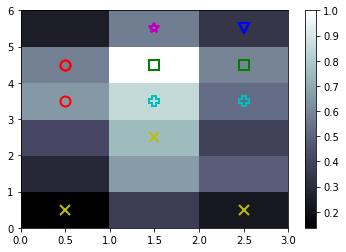

In [8]:
visualize(som, train, train_labels, labels_by_index)

In [9]:
som_tester(test,test_labels, som)
print("------")
som_tester(train, train_labels, som)

(2, 4)     D         
(1, 4)     D         
------
(0, 4)     A         
(0, 3)     A         
(0, 4)     A         
(1, 4)     B         
(1, 4)     B         
(2, 4)     B         
(2, 5)     C         
(2, 5)     C         
(2, 5)     C         
(2, 3)     E         
(1, 3)     E         
(1, 3)     E         
(1, 5)     J         
(1, 5)     J         
(1, 5)     J         
(0, 0)     K         
(1, 2)     K         
(2, 0)     K         


### 2.From Scratch

In [36]:
class SOM:
    def __init__(self, som_size, dataset):
        self.som_size=som_size
        self.dataset=dataset
        self.weights = self.init_weights()
        
    
    # The below method is borrowed from minisom library for visualization.
    def distance_map(self):
        """
        Returns the distance map of the weights.
        Scaling is 'sum' , each cell is the normalised sum of
        the distances between a neuron and its neighbours. Note that this
        method uses the euclidean distance.
        Parameters
        """

        um = np.nan * np.zeros((self.weights.shape[0],self.weights.shape[1],8))

        ii = [[0, -1, -1, -1, 0, 1, 1, 1]]*2
        jj = [[-1, -1, 0, 1, 1, 1, 0, -1]]*2


        for x in range(self.weights.shape[0]):
            for y in range(self.weights.shape[1]):
                w_2 = self.weights[x, y]
                e = y % 2 == 0 
                for k, (i, j) in enumerate(zip(ii[e], jj[e])):
                    if (x+i >= 0 and x+i < self.weights.shape[0] and
                            y+j >= 0 and y+j < self.weights.shape[1]):
                        w_1 = self.weights[x+i, y+j]
                        um[x, y, k] = dist(w_2, w_1)

        um = np.nansum(um, axis=2)

        return um/um.max()


    def decay(self, alpha, i, epochs):
        """Decay function of the learning process.
        Parameters
        ----------
        alpha : float - current learning rate.
        i : int - current iteration.
        epochs : int - maximum number of epochs for the training.
        """
        # return alpha / (1+i/(epochs/2))
        if i%1000==0:
            return alpha * 0.95
        else:
            return alpha
   
        
    # Step1: Init Weights - randomly with the given shape
    def init_weights(self):
        input_size = self.dataset[0].shape
        weights = np.random.uniform(size=(self.som_size+input_size))
        return weights
    
    
    # Step2: Competition - find the closest neuron to a data
    def winner(self, data):
        out = np.zeros(self.weights.shape[:-1])
        for i in range(len(out)):
            for j in range(len(out[0])):
                out[i,j] = dist(self.weights[i,j],data)
        argmin = np.argmin(out)
        
        return int(argmin/out.shape[1]), argmin%out.shape[1]
    
    
    # Step3: Cooperation and Adaptation - update weights
    def weights_updater(self, winner_neuron, data, alpha, sigma):
        for i in range(len(self.weights)):
            for j in range(len(self.weights[0])):  
                d = dist(self.weights[i,j],self.weights[winner_neuron])
                h = gaussian_distance(d, sigma=sigma)
                self.weights[i,j] += alpha * h * (data - self.weights[i,j])                
        
        # return is not necessary, it is just for test in the below cell
        return self.weights
    
    
    # Step4: Iterate
    def train(self, epochs, alpha, sigma):
        for i in range(epochs):
            alpha = self.decay(alpha, i, epochs)
            
            if i%2000==0:
                print(i)
                # print(alpha)

            for data in self.dataset:
                winner_neuron = self.winner(data)
                self.weights_updater(winner_neuron, data, alpha, sigma)

In [37]:
# Test
# weights = SOM.init_weights()
# weights.shape

# SOM.winner(np.array([0,2,3]))

# SOM.weights_updater((2,2), np.array([0,2,3]), alpha=0.4, sigma=0.5)

In [46]:
t0 = time.time()

epochs = 10000

som_network = SOM(som_size=(4, 4), dataset=train)
som_network.train(epochs=epochs, alpha=0.4, sigma=0.7)

execution_time_calculator(t0)

0
2000
4000
6000
8000
time is: 75.0995364189148 seconds.


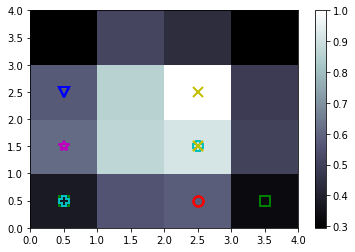

In [47]:
visualize(som_network, train, train_labels, labels_by_index)

In [48]:
som_tester(test,test_labels, som_network)
print("------")
som_tester(train, train_labels, som_network)

(0, 0)     D         
(3, 0)     D         
------
(2, 0)     A         
(2, 0)     A         
(2, 0)     A         
(3, 0)     B         
(3, 0)     B         
(0, 0)     B         
(0, 2)     C         
(0, 2)     C         
(0, 2)     C         
(0, 0)     E         
(2, 1)     E         
(2, 1)     E         
(0, 1)     J         
(0, 1)     J         
(0, 1)     J         
(2, 1)     K         
(2, 1)     K         
(2, 2)     K         


### Part b answers are in the pdf file : HW3-answers.pdf